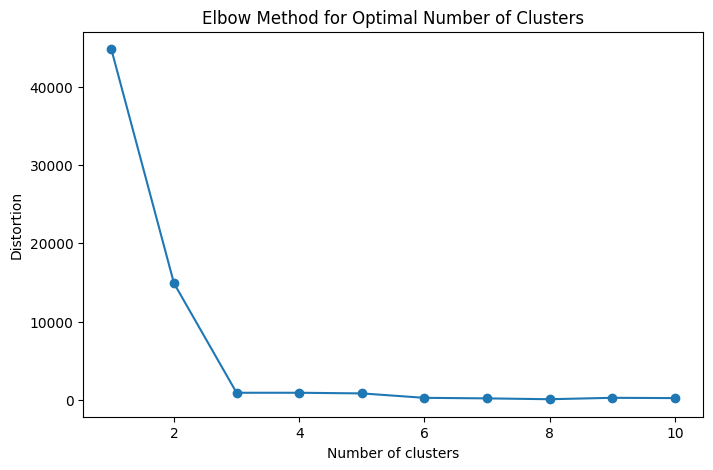

Enter the optimal number of clusters:  3


Distance between city 1 and city 2 = 44.145647269775836
Distance between city 1 and city 3 = 25.460470813852947
Distance between city 2 and city 3 = 25.51851021671384


In [2]:
import cv2                              # For processing the image and saving data as coordinates of highlighted pixels
import numpy as np                      # For numerical operations on data
import matplotlib.pyplot as plt         # For plotting clusters and their centers

# Read the image in grayscale mode
image = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)  # Change the file name to take it as input
# Convert the image to a binary image using a threshold
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the coordinates of the points from the contours
points = []
for contour in contours:
    for point in contour:
        points.append(point[0])
# Convert the list of points to a numpy array
points = np.array(points)

# Function to calculate the Euclidean distance between two points
def width(a, b):
    return np.linalg.norm(a - b)

# Function to initialize the centers for K-means using the K-means++ algorithm
def initial_centers(points, k):
    centers = []
    # Randomly choose the first center
    centers.append(points[np.random.randint(points.shape[0])])
    
    # Choose the remaining centers
    for _ in range(1, k):
        # Compute the distance from each point to the nearest center
        distances = np.array([min([width(p, c) for c in centers]) for p in points])
        # Calculate the probability for each point to be chosen as a center
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        # Choose a new center based on the probabilities
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if r < cumulative_probability:
                centers.append(points[i])
                break
                
    return np.array(centers)

# Function to assign points to the nearest center to form clusters
def form_clusters(points, centers):
    clusters = {}
    # Initialize empty clusters
    for i in range(len(centers)):
        clusters[i] = []
    
    # Assign each point to the nearest center
    for point in points:
        distances = [width(point, center) for center in centers]
        closest_center = np.argmin(distances)
        clusters[closest_center].append(point)
    
    return clusters

# Function to calculate the new centers of the clusters
def new_centre(clusters):
    centers = []
    # Compute the mean of each cluster to get the new center
    for key in clusters.keys():
        cluster_mean = np.mean(clusters[key], axis=0)
        centers.append(cluster_mean)
    return np.array(centers)

# Function to calculate the total distortion (sum of squared distances from points to their cluster centers)
def calculate_distortion(clusters, centers):
    total_distortion = 0
    # Sum the squared distances for all points in all clusters
    for key in clusters.keys():
        for point in clusters[key]:
            total_distortion += width(point, centers[key]) ** 2
        return total_distortion

# K-means clustering function
def kmeans(points, k, max_iters=100):
    # Initialize the centers using the K-means++ method
    centers = initial_centers(points, k)
    
    # Iterate to refine the centers
    for _ in range(max_iters):
        # Form clusters by assigning each point to the nearest center
        clusters = form_clusters(points, centers)
        # Calculate new centers
        new_centers = new_centre(clusters)
        # If centers do not change, convergence is reached
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, clusters

# Elbow method to determine the optimal number of clusters
def calculate_elbow_method(points, max_clusters=10):
    distortions = []
    
    # Compute distortions for different numbers of clusters
    for k in range(1, max_clusters + 1):
        centers, clusters = kmeans(points, k)
        distortion = calculate_distortion(clusters, centers)
        distortions.append(distortion)
    
    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

# Function to calculate the distances between each pair of cluster centers
def center_dist(centers):
    num_clusters = len(centers)
    distances = np.zeros((num_clusters, num_clusters))
    
    # Compute the distances between each pair of centers
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            distances[i, j] = width(centers[i], centers[j])
            distances[j, i] = distances[i, j]  # Symmetric distance matrix
    
    return distances

# Run the elbow method to plot the distortion for different numbers of clusters
calculate_elbow_method(points)

# Prompt the user to enter the optimal number of clusters
optimal_clusters = int(input("Enter the optimal number of clusters: "))

# Perform K-means clustering with the chosen number of clusters
centers, clusters = kmeans(points, optimal_clusters)

# Calculate the distances between the cluster centers
distances = center_dist(centers)

# Print the distances between each pair of cluster centers
for i in range(len(centers)):
    for j in range(i + 1, len(centers)):
        print(f"Distance between city {i+1} and city {j+1} = {distances[i, j]}")

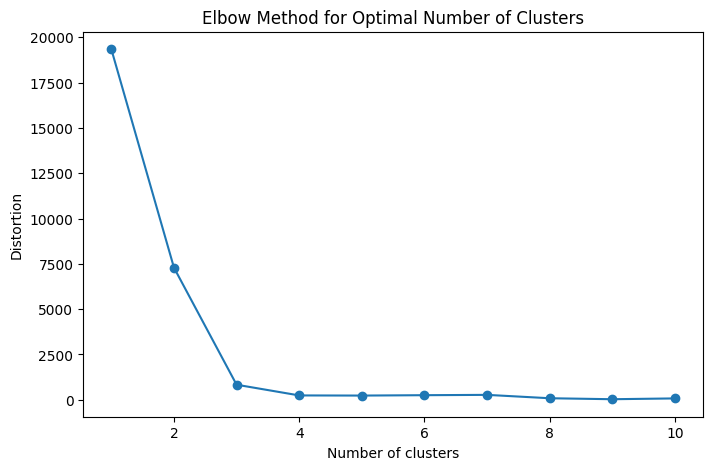

Enter the optimal number of clusters:  3


Distance between city 1 and city 2 = 23.11058262481584
Distance between city 1 and city 3 = 17.971579328938684
Distance between city 2 and city 3 = 21.980887402149605


In [3]:
import cv2                              # For processing the image and saving data as coordinates of highlighted pixels
import numpy as np                      # For numerical operations on data
import matplotlib.pyplot as plt         # For plotting clusters and their centers

# Read the image in grayscale mode
image = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)  # Change the file name to take it as input
# Convert the image to a binary image using a threshold
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the coordinates of the points from the contours
points = []
for contour in contours:
    for point in contour:
        points.append(point[0])
# Convert the list of points to a numpy array
points = np.array(points)

# Function to calculate the Euclidean distance between two points
def width(a, b):
    return np.linalg.norm(a - b)

# Function to initialize the centers for K-means using the K-means++ algorithm
def initial_centers(points, k):
    centers = []
    # Randomly choose the first center
    centers.append(points[np.random.randint(points.shape[0])])
    
    # Choose the remaining centers
    for _ in range(1, k):
        # Compute the distance from each point to the nearest center
        distances = np.array([min([width(p, c) for c in centers]) for p in points])
        # Calculate the probability for each point to be chosen as a center
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        # Choose a new center based on the probabilities
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if r < cumulative_probability:
                centers.append(points[i])
                break
                
    return np.array(centers)

# Function to assign points to the nearest center to form clusters
def form_clusters(points, centers):
    clusters = {}
    # Initialize empty clusters
    for i in range(len(centers)):
        clusters[i] = []
    
    # Assign each point to the nearest center
    for point in points:
        distances = [width(point, center) for center in centers]
        closest_center = np.argmin(distances)
        clusters[closest_center].append(point)
    
    return clusters

# Function to calculate the new centers of the clusters
def new_centre(clusters):
    centers = []
    # Compute the mean of each cluster to get the new center
    for key in clusters.keys():
        cluster_mean = np.mean(clusters[key], axis=0)
        centers.append(cluster_mean)
    return np.array(centers)

# Function to calculate the total distortion (sum of squared distances from points to their cluster centers)
def calculate_distortion(clusters, centers):
    total_distortion = 0
    # Sum the squared distances for all points in all clusters
    for key in clusters.keys():
        for point in clusters[key]:
            total_distortion += width(point, centers[key]) ** 2
        return total_distortion

# K-means clustering function
def kmeans(points, k, max_iters=100):
    # Initialize the centers using the K-means++ method
    centers = initial_centers(points, k)
    
    # Iterate to refine the centers
    for _ in range(max_iters):
        # Form clusters by assigning each point to the nearest center
        clusters = form_clusters(points, centers)
        # Calculate new centers
        new_centers = new_centre(clusters)
        # If centers do not change, convergence is reached
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, clusters

# Elbow method to determine the optimal number of clusters
def calculate_elbow_method(points, max_clusters=10):
    distortions = []
    
    # Compute distortions for different numbers of clusters
    for k in range(1, max_clusters + 1):
        centers, clusters = kmeans(points, k)
        distortion = calculate_distortion(clusters, centers)
        distortions.append(distortion)
    
    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

# Function to calculate the distances between each pair of cluster centers
def center_dist(centers):
    num_clusters = len(centers)
    distances = np.zeros((num_clusters, num_clusters))
    
    # Compute the distances between each pair of centers
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            distances[i, j] = width(centers[i], centers[j])
            distances[j, i] = distances[i, j]  # Symmetric distance matrix
    
    return distances

# Run the elbow method to plot the distortion for different numbers of clusters
calculate_elbow_method(points)

# Prompt the user to enter the optimal number of clusters
optimal_clusters = int(input("Enter the optimal number of clusters: "))

# Perform K-means clustering with the chosen number of clusters
centers, clusters = kmeans(points, optimal_clusters)

# Calculate the distances between the cluster centers
distances = center_dist(centers)

# Print the distances between each pair of cluster centers
for i in range(len(centers)):
    for j in range(i + 1, len(centers)):
        print(f"Distance between city {i+1} and city {j+1} = {distances[i, j]}")

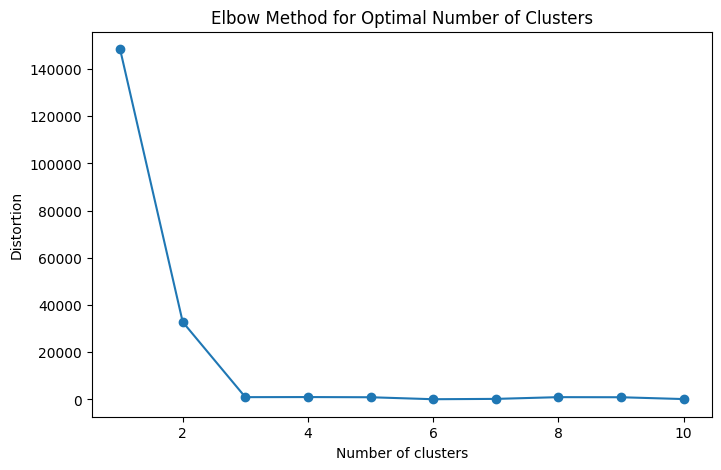

Enter the optimal number of clusters:  4


Distance between city 1 and city 2 = 39.987282787809036
Distance between city 1 and city 3 = 57.31102332007136
Distance between city 1 and city 4 = 40.26142989534828
Distance between city 2 and city 3 = 40.357139698198836
Distance between city 2 and city 4 = 55.660463520037105
Distance between city 3 and city 4 = 39.1746224978909


In [4]:
import cv2                              # For processing the image and saving data as coordinates of highlighted pixels
import numpy as np                      # For numerical operations on data
import matplotlib.pyplot as plt         # For plotting clusters and their centers

# Read the image in grayscale mode
image = cv2.imread('3.png', cv2.IMREAD_GRAYSCALE)  # Change the file name to take it as input
# Convert the image to a binary image using a threshold
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the coordinates of the points from the contours
points = []
for contour in contours:
    for point in contour:
        points.append(point[0])
# Convert the list of points to a numpy array
points = np.array(points)

# Function to calculate the Euclidean distance between two points
def width(a, b):
    return np.linalg.norm(a - b)

# Function to initialize the centers for K-means using the K-means++ algorithm
def initial_centers(points, k):
    centers = []
    # Randomly choose the first center
    centers.append(points[np.random.randint(points.shape[0])])
    
    # Choose the remaining centers
    for _ in range(1, k):
        # Compute the distance from each point to the nearest center
        distances = np.array([min([width(p, c) for c in centers]) for p in points])
        # Calculate the probability for each point to be chosen as a center
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        # Choose a new center based on the probabilities
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if r < cumulative_probability:
                centers.append(points[i])
                break
                
    return np.array(centers)

# Function to assign points to the nearest center to form clusters
def form_clusters(points, centers):
    clusters = {}
    # Initialize empty clusters
    for i in range(len(centers)):
        clusters[i] = []
    
    # Assign each point to the nearest center
    for point in points:
        distances = [width(point, center) for center in centers]
        closest_center = np.argmin(distances)
        clusters[closest_center].append(point)
    
    return clusters

# Function to calculate the new centers of the clusters
def new_centre(clusters):
    centers = []
    # Compute the mean of each cluster to get the new center
    for key in clusters.keys():
        cluster_mean = np.mean(clusters[key], axis=0)
        centers.append(cluster_mean)
    return np.array(centers)

# Function to calculate the total distortion (sum of squared distances from points to their cluster centers)
def calculate_distortion(clusters, centers):
    total_distortion = 0
    # Sum the squared distances for all points in all clusters
    for key in clusters.keys():
        for point in clusters[key]:
            total_distortion += width(point, centers[key]) ** 2
        return total_distortion

# K-means clustering function
def kmeans(points, k, max_iters=100):
    # Initialize the centers using the K-means++ method
    centers = initial_centers(points, k)
    
    # Iterate to refine the centers
    for _ in range(max_iters):
        # Form clusters by assigning each point to the nearest center
        clusters = form_clusters(points, centers)
        # Calculate new centers
        new_centers = new_centre(clusters)
        # If centers do not change, convergence is reached
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, clusters

# Elbow method to determine the optimal number of clusters
def calculate_elbow_method(points, max_clusters=10):
    distortions = []
    
    # Compute distortions for different numbers of clusters
    for k in range(1, max_clusters + 1):
        centers, clusters = kmeans(points, k)
        distortion = calculate_distortion(clusters, centers)
        distortions.append(distortion)
    
    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

# Function to calculate the distances between each pair of cluster centers
def center_dist(centers):
    num_clusters = len(centers)
    distances = np.zeros((num_clusters, num_clusters))
    
    # Compute the distances between each pair of centers
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            distances[i, j] = width(centers[i], centers[j])
            distances[j, i] = distances[i, j]  # Symmetric distance matrix
    
    return distances

# Run the elbow method to plot the distortion for different numbers of clusters
calculate_elbow_method(points)

# Prompt the user to enter the optimal number of clusters
optimal_clusters = int(input("Enter the optimal number of clusters: "))

# Perform K-means clustering with the chosen number of clusters
centers, clusters = kmeans(points, optimal_clusters)

# Calculate the distances between the cluster centers
distances = center_dist(centers)

# Print the distances between each pair of cluster centers
for i in range(len(centers)):
    for j in range(i + 1, len(centers)):
        print(f"Distance between city {i+1} and city {j+1} = {distances[i, j]}")

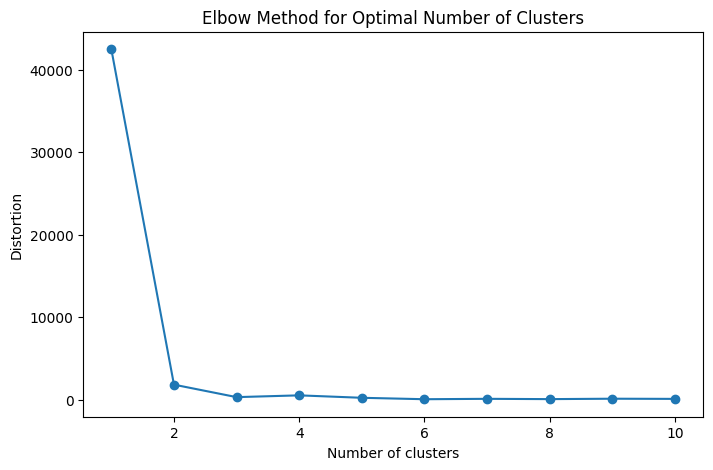

Enter the optimal number of clusters:  2


Distance between city 1 and city 2 = 40.93880305445248


In [5]:
import cv2                              # For processing the image and saving data as coordinates of highlighted pixels
import numpy as np                      # For numerical operations on data
import matplotlib.pyplot as plt         # For plotting clusters and their centers

# Read the image in grayscale mode
image = cv2.imread('4.png', cv2.IMREAD_GRAYSCALE)  # Change the file name to take it as input
# Convert the image to a binary image using a threshold
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the coordinates of the points from the contours
points = []
for contour in contours:
    for point in contour:
        points.append(point[0])
# Convert the list of points to a numpy array
points = np.array(points)

# Function to calculate the Euclidean distance between two points
def width(a, b):
    return np.linalg.norm(a - b)

# Function to initialize the centers for K-means using the K-means++ algorithm
def initial_centers(points, k):
    centers = []
    # Randomly choose the first center
    centers.append(points[np.random.randint(points.shape[0])])
    
    # Choose the remaining centers
    for _ in range(1, k):
        # Compute the distance from each point to the nearest center
        distances = np.array([min([width(p, c) for c in centers]) for p in points])
        # Calculate the probability for each point to be chosen as a center
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        # Choose a new center based on the probabilities
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if r < cumulative_probability:
                centers.append(points[i])
                break
                
    return np.array(centers)

# Function to assign points to the nearest center to form clusters
def form_clusters(points, centers):
    clusters = {}
    # Initialize empty clusters
    for i in range(len(centers)):
        clusters[i] = []
    
    # Assign each point to the nearest center
    for point in points:
        distances = [width(point, center) for center in centers]
        closest_center = np.argmin(distances)
        clusters[closest_center].append(point)
    
    return clusters

# Function to calculate the new centers of the clusters
def new_centre(clusters):
    centers = []
    # Compute the mean of each cluster to get the new center
    for key in clusters.keys():
        cluster_mean = np.mean(clusters[key], axis=0)
        centers.append(cluster_mean)
    return np.array(centers)

# Function to calculate the total distortion (sum of squared distances from points to their cluster centers)
def calculate_distortion(clusters, centers):
    total_distortion = 0
    # Sum the squared distances for all points in all clusters
    for key in clusters.keys():
        for point in clusters[key]:
            total_distortion += width(point, centers[key]) ** 2
        return total_distortion

# K-means clustering function
def kmeans(points, k, max_iters=100):
    # Initialize the centers using the K-means++ method
    centers = initial_centers(points, k)
    
    # Iterate to refine the centers
    for _ in range(max_iters):
        # Form clusters by assigning each point to the nearest center
        clusters = form_clusters(points, centers)
        # Calculate new centers
        new_centers = new_centre(clusters)
        # If centers do not change, convergence is reached
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, clusters

# Elbow method to determine the optimal number of clusters
def calculate_elbow_method(points, max_clusters=10):
    distortions = []
    
    # Compute distortions for different numbers of clusters
    for k in range(1, max_clusters + 1):
        centers, clusters = kmeans(points, k)
        distortion = calculate_distortion(clusters, centers)
        distortions.append(distortion)
    
    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

# Function to calculate the distances between each pair of cluster centers
def center_dist(centers):
    num_clusters = len(centers)
    distances = np.zeros((num_clusters, num_clusters))
    
    # Compute the distances between each pair of centers
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            distances[i, j] = width(centers[i], centers[j])
            distances[j, i] = distances[i, j]  # Symmetric distance matrix
    
    return distances

# Run the elbow method to plot the distortion for different numbers of clusters
calculate_elbow_method(points)

# Prompt the user to enter the optimal number of clusters
optimal_clusters = int(input("Enter the optimal number of clusters: "))

# Perform K-means clustering with the chosen number of clusters
centers, clusters = kmeans(points, optimal_clusters)

# Calculate the distances between the cluster centers
distances = center_dist(centers)

# Print the distances between each pair of cluster centers
for i in range(len(centers)):
    for j in range(i + 1, len(centers)):
        print(f"Distance between city {i+1} and city {j+1} = {distances[i, j]}")